In [3]:
#tHE Clothing Fashion-MNIST is a dataset of images from Zalando (Europe's biggest online fashion retailer)
# it consists of 60000 training samples and 10000 testing samples
# Each sample is a 28*28 grayscale image associated with a label from 10 classes
# http://yann.lecun.com/exdb/mnist/

10 classes are:


1.   T-shirt/top

1.   Trouser

1.   Pullover

1.   Dress

1.   Coat

1.   Sandal
2.   Shirt


2.   Sneaker


2.   bag


2.   Ankle Boot





In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [5]:
# define classname
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(train_images.shape)

(60000, 28, 28)


In [7]:
print(test_images.shape)

(10000, 28, 28)


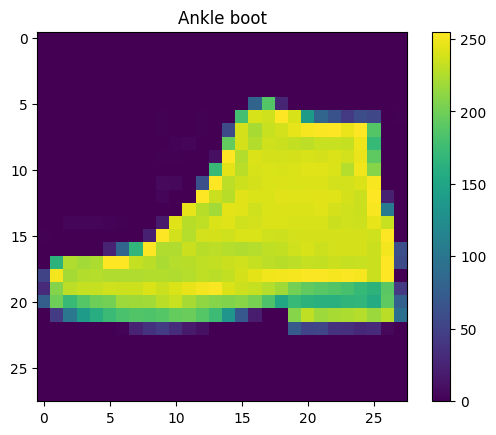

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_images[42])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[42]])
plt.show()

In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
train_images = train_images/255.0
test_images = test_images/255.0

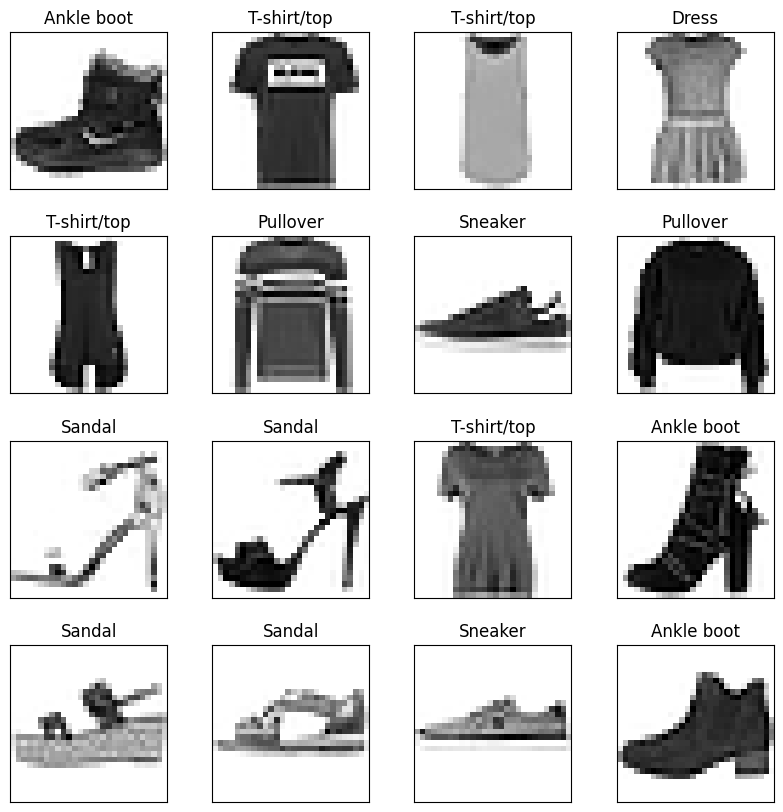

In [10]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

In [11]:
# Architecting CNN model
# The CNN has two main components: The feature extractor composed of a set of convolutional and pooling layers and the classifier backend similar to a regular neural network

In [12]:
# we need to reshape the data into 4-dimensions
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(X_train.shape)

(60000, 28, 28, 1)


The first dimension is the number of samples


---
The fourth dimension is the appended one representing the grayscale images


In [13]:
# random seed in tensorflow for reproducility
tf.random.set_seed(42)
from tensorflow.keras import datasets, layers, models, losses
model = models.Sequential()
# add the first convolutional layers with 32 small-sized 3*3 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Convolutional layer is followed by a max-pooling layer with a 2*2 filter
model.add(layers.MaxPooling2D((2, 2)))
# second convolutional layer with 64 3*3 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# third convolutional layer with 128 3*3 filters
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#The resulting filter maps are flatten to provide features to the downstream classifier backend
model.add(layers.Flatten())
#Classifier backend
model.add(layers.Dense(64, activation='relu'))
#output with 10 nodes demonstrating 10 classes
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

The benefits of applying pooling are:


1.   avoiding overfitting
2.   Reducing training cost



In [15]:
model.fit(X_train, train_labels, validation_split=0.15, epochs=10, batch_size= 256) # batch size is 32 by default
# model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10) # batch size is 32 by default

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 45s 212ms/step - accuracy: 0.6239 - loss: 1.0820 - val_accuracy: 0.7989 - val_loss: 0.5471
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 80s 202ms/step - accuracy: 0.8271 - loss: 0.4667 - val_accuracy: 0.8536 - val_loss: 0.4181
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.8639 - loss: 0.3801 - val_accuracy: 0.8724 - val_loss: 0.3615
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 197ms/step - accuracy: 0.8813 - loss: 0.3349 - val_accuracy: 0.8810 - val_loss: 0.3383
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 42s 203ms/step - accuracy: 0.8893 - loss: 0.3073 - val_accuracy: 0.8876 - val_loss: 0.3211
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.8969 - loss: 0.2863 - val_accuracy: 0.8912 - val_loss: 0.3060
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - accuracy: 0.9041 - loss: 0.2664 - val_accuracy: 0.8978 - val_loss: 0.2928
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.9090 - loss: 0

In [16]:
# 96% on training set and 91% on the testing set
# double check the performance
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 3s - 11ms/step - accuracy: 0.9000 - loss: 0.2848
Accuracy on test set:  0.8999999761581421


In [17]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [18]:
print(predictions[0])

[8.1107698e-09 2.6429517e-10 1.5695727e-09 1.9089161e-09 7.4172758e-14
 5.7344389e-04 3.5849823e-10 6.2396697e-04 1.0638570e-05 9.9879193e-01]


In [19]:
import numpy as np

print('Predicted label for the first test sample: ', np.argmax(predictions[0]))

Predicted label for the first test sample:  9


In [20]:
print('True label for the first test sample: ', test_labels[0])

True label for the first test sample:  9


In [21]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

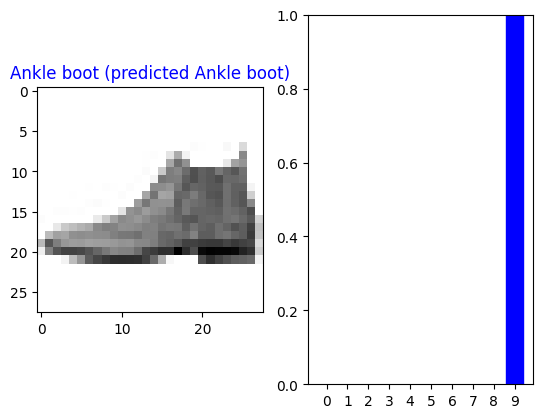

In [22]:
plot_image_prediction(0, test_images, predictions, test_labels, class_names)

In [23]:
model.layers[2].get_weights()[0].shape

(3, 3, 32, 64)

In [24]:
#
filters, _ = model.layers[2].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max-f_min)

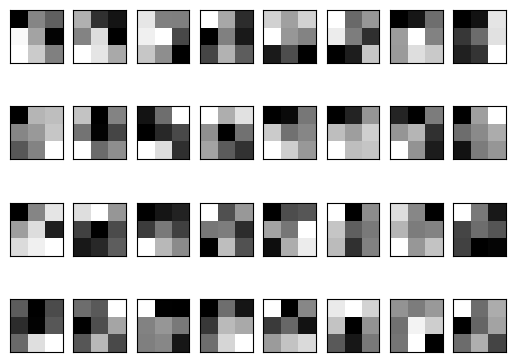

In [25]:
n_filters = 32
for i in range(n_filters):
  filter = filters[:, :, :, i]
  plt.subplot(4, 8, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(filter[:, :, 0], cmap='gray')

plt.show()

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
n_small = 500
X_train = X_train[:n_small]
train_labels = train_labels[:n_small]
print(X_train.shape)

(500, 28, 28, 1)


In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [28]:
model.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [29]:
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=20, batch_size=40)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.2853 - loss: 2.0691 - val_accuracy: 0.5524 - val_loss: 1.3119
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - accuracy: 0.5665 - loss: 1.2511 - val_accuracy: 0.6579 - val_loss: 0.9655
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - accuracy: 0.7272 - loss: 0.8627 - val_accuracy: 0.6808 - val_loss: 0.9286
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.7443 - loss: 0.7475 - val_accuracy: 0.6717 - val_loss: 0.9543
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.7592 - loss: 0.6889 - val_accuracy: 0.6922 - val_loss: 0.8565
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.7913 - loss: 0.6031 - val_accuracy: 0.7346 - val_loss: 0.7518
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.8304 - loss: 0.5308 - val_accuracy: 0.7228 - val_loss: 0.7459
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.8162 - loss: 0.5210 - val_accuracy: 0.

In [30]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.8034 - loss: 0.7428
Accuracy on test set: 0.8033999800682068


The accuracy  without augmentation has a classification accuracy of 79.5%

In [31]:
datagen = ImageDataGenerator(height_shift_range=3,
                              horizontal_flip=True
                              )


In [32]:
model_aug = tf.keras.models.clone_model(model)

In [33]:
model_aug.compile(optimizer='adam',
               loss=losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [34]:
train_generator = datagen.flow(X_train, train_labels, seed=42, batch_size=40)

model_aug.fit(train_generator, epochs=50, validation_data=(X_test, test_labels))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.2732 - loss: 2.1686 - val_accuracy: 0.4426 - val_loss: 1.5473
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.4896 - loss: 1.4756 - val_accuracy: 0.5692 - val_loss: 1.1517
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step - accuracy: 0.6070 - loss: 1.1197 - val_accuracy: 0.6569 - val_loss: 0.9461
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.6701 - loss: 0.9216 - val_accuracy: 0.6656 - val_loss: 0.8999
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 483ms/step - accuracy: 0.7345 - loss: 0.7726 - val_accuracy: 0.6799 - val_loss: 0.8721
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - accuracy: 0.7129 - loss: 0.8127 - val_accuracy: 0.6979 - val_loss: 0.8525
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - accuracy: 0.7422 - loss: 0.7552 - val_accuracy: 0.7091 - val_loss: 0.8029
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 461ms/step - accuracy: 0.7721 - loss: 0.6646 - val_accuracy: 0.7048 - val_

In [35]:
test_loss, test_acc = model_aug.evaluate(X_test, test_labels, verbose=2)
print('Accuracy on test set: ',test_acc)

313/313 - 3s - 10ms/step - accuracy: 0.7753 - loss: 1.0255
Accuracy on test set:  0.7753000259399414
